In [97]:
include("FiguresforPNAS.jl")

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61


Temp Diff is 0.47945142681236286


┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67
┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67
┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::A

8×2 Array{Any,2}:
 "Vegan"       31.9459   
 "Vegetarian"  20.027    
 "Beef"         0.0630631
 "Dairy"        0.018018 
 "Poultry"      0.018018 
 "Pork"         0.0      
 "Eggs"         0.0      
 "Sheep/Goat"   0.0540541

In [98]:
BaselineSCs

8×2 Array{Any,2}:
 "Vegan"       80.2883    
 "Vegetarian"  48.3784    
 "Beef"         0.18018   
 "Dairy"        0.0990991 
 "Poultry"      0.036036  
 "Pork"         0.00900901
 "Eggs"         0.018018  
 "Sheep/Goat"   0.108108  

In [32]:
M1 = 100*(ones(length(MReduc1)) - MReduc1)
E1 = 100*(ones(size(EIndReduc1)[1], length(isotemps)) - EIndReduc1)

11×3 Array{Float64,2}:
 26.5  49.0  73.0
 28.5  51.0  75.5
 30.5  53.0  77.5
 32.5  55.5  80.0
 35.0  57.5  82.5
 37.0  60.0  85.0
 39.0  62.5  87.5
 41.5  64.5  90.0
 43.5  67.0  93.0
 46.0  70.0  95.5
 48.5  72.5  98.5

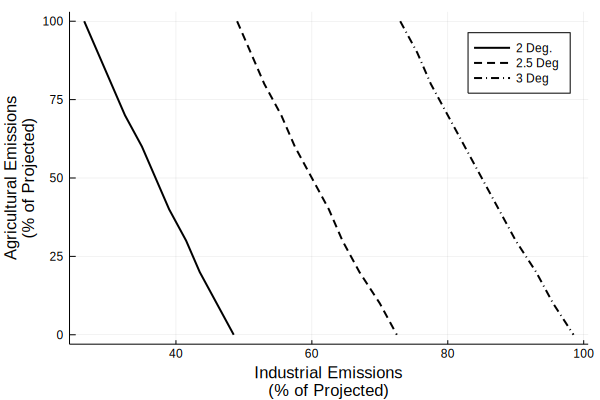

In [34]:
plot(E1, M1, label=["2 Deg." "2.5 Deg" "3 Deg"], color=:black, linestyle=[:solid :dash :dashdot], linewidth=2, ylabel="Agricultural Emissions \n (% of Projected)", xlabel="Industrial Emissions \n (% of Projected)")

In [55]:
Diets = ["Vegan", "Vegetarian", "Beef", "Dairy", "Poultry", "Pork", "Eggs", "SheepGoat"]

8-element Array{String,1}:
 "Vegan"     
 "Vegetarian"
 "Beef"      
 "Dairy"     
 "Poultry"   
 "Pork"      
 "Eggs"      
 "SheepGoat" 

In [50]:
test = ones(8)

8-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [56]:
[Diets test]

8×2 Array{Any,2}:
 "Vegan"       1.0
 "Vegetarian"  1.0
 "Beef"        1.0
 "Dairy"       1.0
 "Poultry"     1.0
 "Pork"        1.0
 "Eggs"        1.0
 "SheepGoat"   1.0

In [71]:
include("VegSocialCosts.jl")

VegSocialCosts (generic function with 1 method)

In [67]:
Diets = [4.8; 8; 2.7; 6.7; 1.5; .06]
Intensities = [65.1 6.5 .22; 14.6 2.1 .22; 25.6 .02 .02; 25.1 .70 .03; 20.1 .07 .03; 20 4.5 .016]

6×3 Array{Float64,2}:
 65.1  6.5   0.22 
 14.6  2.1   0.22 
 25.6  0.02  0.02 
 25.1  0.7   0.03 
 20.1  0.07  0.03 
 20.0  4.5   0.016

In [80]:
ESEA_Intensities = [49.9 8.85 .266; 19.92 2.17 .07; 35.7 .031 .049; 26.7 .81 .053; 26.9 0.05 .039; 30.0 4.36 .131]
EEU_Intensities  = [29.9 2.11 .07; 10.1 1.84 .03; 14.4 .02 .02; 25.1 .35 .03; 8.2 .02 .03; 14.3 1.84 .05]
LatAm_Intensities = [141.84 7.89 .24; 13.15 2.9 .24; 25.44 .02 .02; 27.4 .62 0.04; 16.9 .17 .02; 12.46 6.29 .13]
MidEast_Intensities = [16.04 5.62 .43; 14.9 3.48 .25; 27.34 .02 .03; 39.9 0.65 .04; 14.2 .1 .02; 24.3 5.32 .4]
NO_Intensities 		= [14.08 3.67 .14	; 14.4 1.44 .02		; 14.35 .02 .02	; 15.24 .61 .02	; 7.57 .12 .02	; 22.3 4.17 .18]
Oceania_Intensities = [21.7 4.39 .22	; 15.02 2.93 .10	; 28.4 .02 .02	; 25.02 2.01 .02; 12.8 .05 .02	; 16.25 2.93 .10]
Socialcosts = VegSocialCosts(Oceania_Intensities, Diets)

┌ Warning: interpolate(A, BSpline(Linear()), OnGrid()) is deprecated, use interpolate(A, BSpline(Linear()))
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:61
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:61
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{ExpandedIndexTypes, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = dice_interpolate(::Array{Float64,1}, ::Int64) at helpers.jl:67
└ @ Main C:\Users\Kevin\Documents\GitHub\DICEFARM\src_annualized\helpers.jl:67


8×2 Array{Any,2}:
 "Vegan"       41.4909    
 "Vegetarian"  27.7182    
 "Beef"         0.118182  
 "Dairy"        0.0454545 
 "Poultry"      0.0181818 
 "Pork"         0.00909091
 "Eggs"         0.0       
 "Sheep/Goat"   0.127273  

In [74]:
Intensities

6×3 Array{Float64,2}:
 65.1  6.5   0.22 
 14.6  2.1   0.22 
 25.6  0.02  0.02 
 25.1  0.7   0.03 
 20.1  0.07  0.03 
 20.0  4.5   0.016

In [75]:
ESEA_Intensities

6×3 Array{Float64,2}:
 49.9   8.85   0.266
 19.92  2.17   0.069
 35.7   0.031  0.049
 26.7   0.81   0.053
 26.9   0.05   0.039
 30.0   4.36   0.131